## iris dataset from sklearn

In [0]:
from sklearn.model_selection import train_test_split
from sklearn import datasets

In [0]:
iris_dataset = datasets.load_iris()
# iris_dataset.DESCR

## get data and label(target) from iris dataset

In [0]:
iris_data = iris_dataset.data
iris_target = iris_dataset.target

### saperate train set and test set

In [0]:
train_iris_data, test_iris_data, tarin_iris_target, test_iris_target = train_test_split(iris_data, iris_target, test_size=0.2, random_state=0 )
tarin_iris_target[:5], test_iris_target[:5], train_iris_data[:5], test_iris_data[:5]

(array([2, 1, 0, 2, 2]), array([2, 1, 0, 2, 0]), array([[6.4, 3.1, 5.5, 1.8],
        [5.4, 3. , 4.5, 1.5],
        [5.2, 3.5, 1.5, 0.2],
        [6.1, 3. , 4.9, 1.8],
        [6.4, 2.8, 5.6, 2.2]]), array([[5.8, 2.8, 5.1, 2.4],
        [6. , 2.2, 4. , 1. ],
        [5.5, 4.2, 1.4, 0.2],
        [7.3, 2.9, 6.3, 1.8],
        [5. , 3.4, 1.5, 0.2]]))

In [0]:
train_iris_data, test_iris_data, train_iris_target, test_iris_target = train_test_split(iris_data, iris_target, test_size=0.2)
train_iris_target[:5], test_iris_target[:5], train_iris_data[:5], test_iris_data[:5]

(array([0, 0, 1, 2, 2]), array([2, 2, 2, 1, 2]), array([[4.8, 3.1, 1.6, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.6, 2.9, 3.6, 1.3],
        [6.4, 3.1, 5.5, 1.8],
        [6.1, 3. , 4.9, 1.8]]), array([[6.3, 2.9, 5.6, 1.8],
        [6.8, 3.2, 5.9, 2.3],
        [5.9, 3. , 5.1, 1.8],
        [6.4, 3.2, 4.5, 1.5],
        [6.3, 3.3, 6. , 2.5]]))

#Classfication

##Decision Tree

In [0]:
from sklearn.tree import DecisionTreeClassifier

decisionTree = DecisionTreeClassifier(criterion='entropy',random_state=0)

In [0]:
decisionTree.fit(train_iris_data, train_iris_target)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [0]:
decisionTree.score(test_iris_data, test_iris_target)

0.9666666666666667

In [0]:
predict_iris = decisionTree.predict(test_iris_data)

In [0]:
from sklearn.metrics import classification_report
print(classification_report(test_iris_target, predict_iris))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.83      0.91         6
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.94      0.95        30
weighted avg       0.97      0.97      0.97        30



In [0]:
import pandas as pd

In [0]:
df_merge = pd.DataFrame({'test':test_iris_target , 'predict':predict_iris})

###export_graphviz

In [0]:
from sklearn.tree import export_graphviz
import graphviz

In [0]:
# export_gp = export_graphviz(decisionTree, class_names=iris_dataset.target_names, feature_names=iris_dataset.feature_names)

export_gp = export_graphviz(decisionTree)

In [0]:
# with open('tree.dot') as f:
#   dot_graph = f.read()

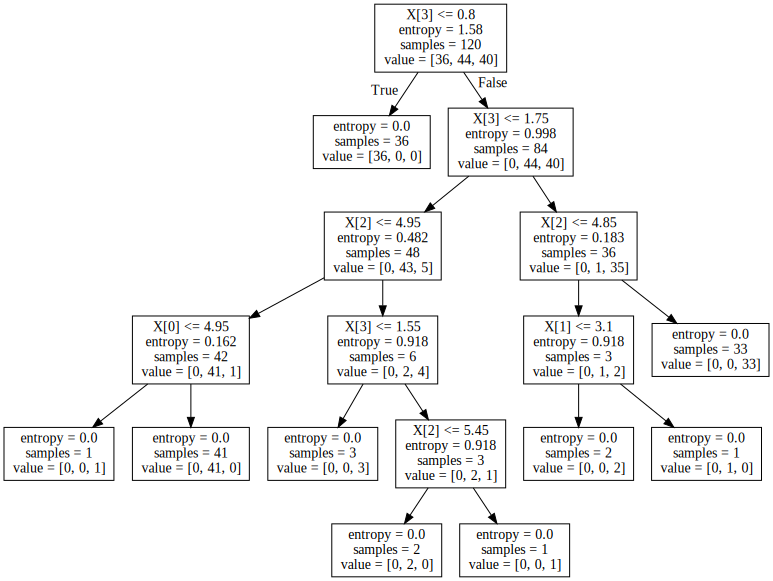

In [0]:
# graphviz.Source(dot_graph)
graphviz.Source(export_gp)

### view barplot

#Other Model

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


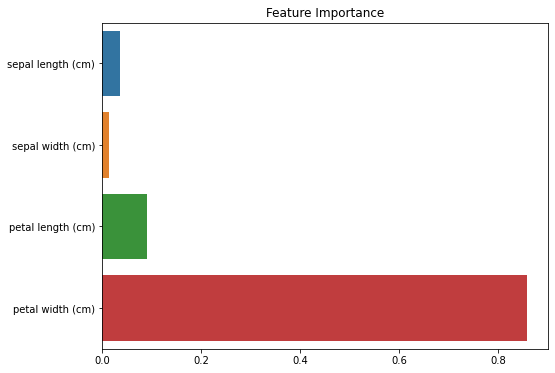

In [0]:
fi = pd.Series(decisionTree.feature_importances_, iris_dataset.feature_names)
fi.sort_values()
plt.figure(figsize=(8,6)), plt.title('Feature Importance')
sns.barplot(x=fi, y=fi.index)

In [0]:
result = dict()

decisionTree.fit(train_iris_data, train_iris_target)
result['Tree'] = decisionTree.score(test_iris_data, test_iris_target)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Tree    0.966667
lr      1.000000
svc     1.000000
knn     1.000000
nb      1.000000
gbc     1.000000
rf      1.000000
xgb     1.000000
dtype: float64


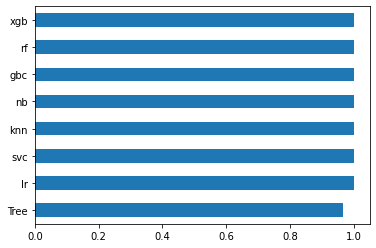

In [0]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_iris_data, train_iris_target)
result['lr'] = lr.score(test_iris_data, test_iris_target)

from sklearn.svm import SVC
svc = SVC()
svc.fit(train_iris_data, train_iris_target)
result['svc'] = svc.score(test_iris_data, test_iris_target)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(train_iris_data, train_iris_target)
result['knn'] = knn.score(test_iris_data, test_iris_target)

from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(train_iris_data, train_iris_target)
result['nb'] = nb.score(test_iris_data, test_iris_target)

from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(random_state=0)
gbc.fit(train_iris_data, train_iris_target)
result['gbc'] = gbc.score(test_iris_data, test_iris_target)

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=0)
rf.fit(train_iris_data, train_iris_target)
result['rf'] = rf.score(test_iris_data, test_iris_target)

from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=0)
xgb.fit(train_iris_data, train_iris_target)
result['xgb'] = xgb.score(test_iris_data, test_iris_target)

se1 = pd.Series(result).sort_values()
print(se1)
se1.plot(kind='barh')

In [0]:
series = pd.Series(result)
print(series.sort_values(ascending=False))

xgb     1.000000
rf      1.000000
gbc     1.000000
nb      1.000000
knn     1.000000
svc     1.000000
lr      1.000000
Tree    0.966667
dtype: float64


#평가

##classification_report

In [0]:
# 분류모델 평가
from sklearn import metrics
#1 -> 스팸 0 -> 정상
predict_data = [1, 0, 1, 1, 0, 0, 1, 1]
true_data  = [1, 0, 0, 1, 1, 0, 1, 0]

print('정확도:',metrics.accuracy_score(true_data, predict_data))
print('정밀도:',metrics.precision_score(true_data, predict_data))
print('재현율:',metrics.recall_score(true_data, predict_data))
print('f1 score:',metrics.f1_score(true_data, predict_data))

정확도: 0.625
정밀도: 0.6
재현율: 0.75
f1 score: 0.6666666666666665


In [0]:
from sklearn.metrics import classification_report
print(classification_report(true_data, predict_data))

              precision    recall  f1-score   support

           0       0.67      0.50      0.57         4
           1       0.60      0.75      0.67         4

    accuracy                           0.62         8
   macro avg       0.63      0.62      0.62         8
weighted avg       0.63      0.62      0.62         8

